In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import time
import datetime
import matplotlib.ticker as mticker

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets

In [2]:
file=pd.read_csv('pretreated_2.csv')
file

,name,area,direction,total_price,unit_price,room,hall,qita,maopi,jianzhuang,...,qingshan,huangpi,talou,pingfang,banta,banlou,max_height,medium,low,high
0,民航小区,71.00,1,112.0,15775,3,2,False,False,True,...,False,False,False,False,False,True,7,True,False,False
1,万科城,83.30,1,187.0,22449,3,2,False,False,False,...,False,False,False,False,False,True,30,True,False,False
2,仁厚社区,123.80,1,165.0,13328,3,2,False,False,False,...,False,False,True,False,False,False,18,False,False,True
3,江北园丁苑,144.95,1,146.0,10073,4,2,False,False,False,...,False,False,False,False,False,True,7,True,False,False
4,新华公寓,132.98,1,155.0,11656,3,2,False,True,False,...,False,False,False,False,False,True,6,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38085,绿地城,94.22,1,35.0,3715,2,1,True,False,False,...,False,False,False,False,False,True,6,True,False,False
38086,航城丽都,107.96,1,55.0,5095,3,2,True,False,False,...,False,False,False,False,False,True,33,False,False,True
38087,东庭郡园,87.32,1,48.0,5498,2,1,True,False,False,...,False,False,False,False,True,False,16,False,False,True
38088,碧桂园翠堤春晓,122.61,1,61.0,4976,3,2,False,False,False,...,False,False,False,False,False,True,6,True,False,False


In [3]:
file.drop(file.tail(1).index,inplace=True)
file

,name,area,direction,total_price,unit_price,room,hall,qita,maopi,jianzhuang,...,qingshan,huangpi,talou,pingfang,banta,banlou,max_height,medium,low,high
0,民航小区,71.00,1,112.0,15775,3,2,False,False,True,...,False,False,False,False,False,True,7,True,False,False
1,万科城,83.30,1,187.0,22449,3,2,False,False,False,...,False,False,False,False,False,True,30,True,False,False
2,仁厚社区,123.80,1,165.0,13328,3,2,False,False,False,...,False,False,True,False,False,False,18,False,False,True
3,江北园丁苑,144.95,1,146.0,10073,4,2,False,False,False,...,False,False,False,False,False,True,7,True,False,False
4,新华公寓,132.98,1,155.0,11656,3,2,False,True,False,...,False,False,False,False,False,True,6,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38084,绿地城,61.03,1,25.0,4097,2,1,True,False,False,...,False,False,False,False,False,True,6,True,False,False
38085,绿地城,94.22,1,35.0,3715,2,1,True,False,False,...,False,False,False,False,False,True,6,True,False,False
38086,航城丽都,107.96,1,55.0,5095,3,2,True,False,False,...,False,False,False,False,False,True,33,False,False,True
38087,东庭郡园,87.32,1,48.0,5498,2,1,True,False,False,...,False,False,False,False,True,False,16,False,False,True


In [4]:
del file['name']
file

,area,direction,total_price,unit_price,room,hall,qita,maopi,jianzhuang,jingzhuang,...,qingshan,huangpi,talou,pingfang,banta,banlou,max_height,medium,low,high
0,71.00,1,112.0,15775,3,2,False,False,True,False,...,False,False,False,False,False,True,7,True,False,False
1,83.30,1,187.0,22449,3,2,False,False,False,True,...,False,False,False,False,False,True,30,True,False,False
2,123.80,1,165.0,13328,3,2,False,False,False,True,...,False,False,True,False,False,False,18,False,False,True
3,144.95,1,146.0,10073,4,2,False,False,False,True,...,False,False,False,False,False,True,7,True,False,False
4,132.98,1,155.0,11656,3,2,False,True,False,False,...,False,False,False,False,False,True,6,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38084,61.03,1,25.0,4097,2,1,True,False,False,False,...,False,False,False,False,False,True,6,True,False,False
38085,94.22,1,35.0,3715,2,1,True,False,False,False,...,False,False,False,False,False,True,6,True,False,False
38086,107.96,1,55.0,5095,3,2,True,False,False,False,...,False,False,False,False,False,True,33,False,False,True
38087,87.32,1,48.0,5498,2,1,True,False,False,False,...,False,False,False,False,True,False,16,False,False,True


In [5]:
y=np.log1p(file['unit_price'])
del file['total_price']
del file['unit_price']
print(file,end='\n\n\n')
print(y)

         area  direction  room  hall   qita  maopi  jianzhuang  jingzhuang  \
0       71.00          1     3     2  False  False        True       False   
1       83.30          1     3     2  False  False       False        True   
2      123.80          1     3     2  False  False       False        True   
3      144.95          1     4     2  False  False       False        True   
4      132.98          1     3     2  False   True       False       False   
...       ...        ...   ...   ...    ...    ...         ...         ...   
38084   61.03          1     2     1   True  False       False       False   
38085   94.22          1     2     1   True  False       False       False   
38086  107.96          1     3     2   True  False       False       False   
38087   87.32          1     2     1   True  False       False       False   
38088  122.61          1     3     2  False  False       False        True   

       donghugaoxin  dongxihu  ...  qingshan  huangpi  talou  p

## 1、线性回归模型

模型训练时间： 0.11478567123413086
模型预测时间： 0.003201723098754883
Train success! 
Some results :
MSE: 0.07111053255836453
RMSE: 0.2666655818780604
Rsquare: 0.6688173085820857
训练集分数： 0.6672291186699701
验证集分数： 0.6688173085820857


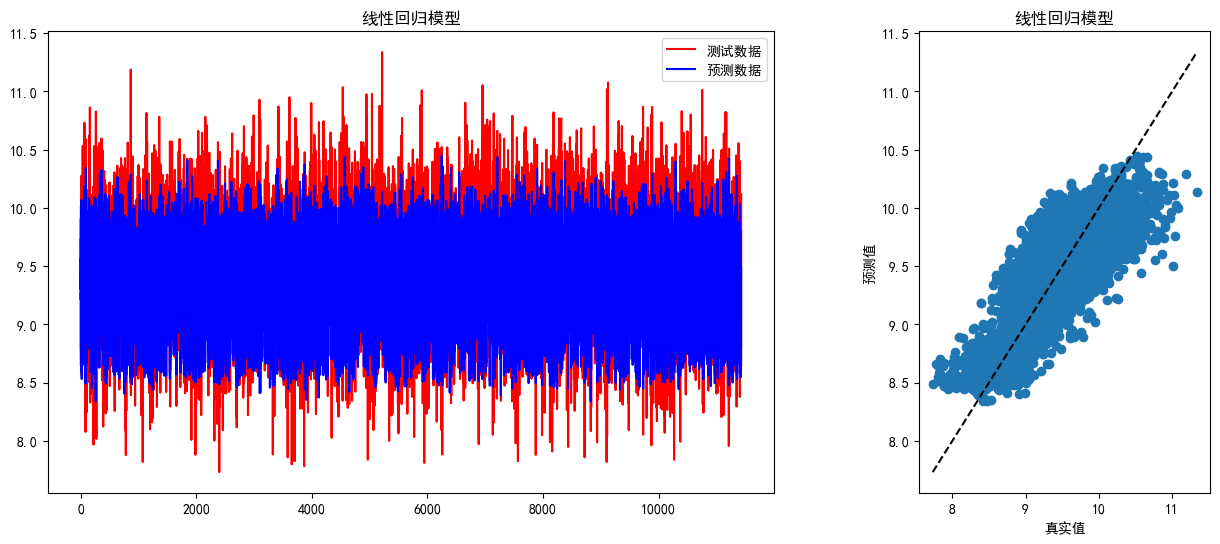

In [6]:
MSE=np.zeros(11)
RMSE=np.zeros(11)
Rsquare=np.zeros(11)
score1=np.zeros(11)
score2=np.zeros(11)
fit_time=np.zeros(11)
predict_time=np.zeros(11)
num=1;

x=file
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
startTime = time.time()
lr = LinearRegression()
lr_modal=lr.fit(x_train, y_train) 
stopTime = time.time()
fit_time[num-1]=stopTime-startTime
print('模型训练时间：',fit_time[num-1])
startTime=time.time()
y_pred = lr_modal.predict(x_test)
stopTime=time.time()
predict_time[num-1]=stopTime-startTime
print('模型预测时间：',predict_time[num-1])

#训练后模型指标
MSE[num-1] = metrics.mean_squared_error(y_test, y_pred)
RMSE[num-1] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
Rsquare[num-1] = metrics.r2_score(y_test, y_pred)
score1[num-1]=lr_modal.score(x_train,y_train)
score2[num-1]=lr_modal.score(x_test,y_test)
print("Train success! \nSome results :")
print('MSE:', MSE[num-1])
print('RMSE:', RMSE[num-1])
print('Rsquare:', Rsquare[num-1])
print("训练集分数：",score1[num-1])
print("验证集分数：",score2[num-1])


#画图
mpl.rcParams['font.family'] = ['sans-serif']
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False     #显示中文


str1='线性回归模型'
grid = plt.GridSpec(1, 3, wspace=0.5, hspace=0.5)
plt.figure(figsize=(15,6))
ax1=plt.subplot(grid[0,0:2])
ax1.plot(range(len(y_test)), y_test, 'r', label='测试数据')
ax1.plot(range(len(y_test)), y_pred, 'b', label='预测数据')
ax1.legend(['测试数据','预测数据'])
ax1.set_title(str1)

ax2=plt.subplot(grid[0,2])
ax2.scatter(y_test, y_pred)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax2.set(xlabel='真实值',ylabel='预测值')
ax2.set_title(str1)

plt.savefig(fname='modal_picture/'+str1+'测试',bbox_inches='tight')

## 2、KNN回归模型

模型训练时间： 0.0055179595947265625
模型预测时间： 0.22201848030090332
Train success! 
Some results :
MSE: 0.11479659486131062
RMSE: 0.3388164619101478
Rsquare: 0.46535845135772735
训练集分数： 0.654536279022794
验证集分数： 0.46535845135772735


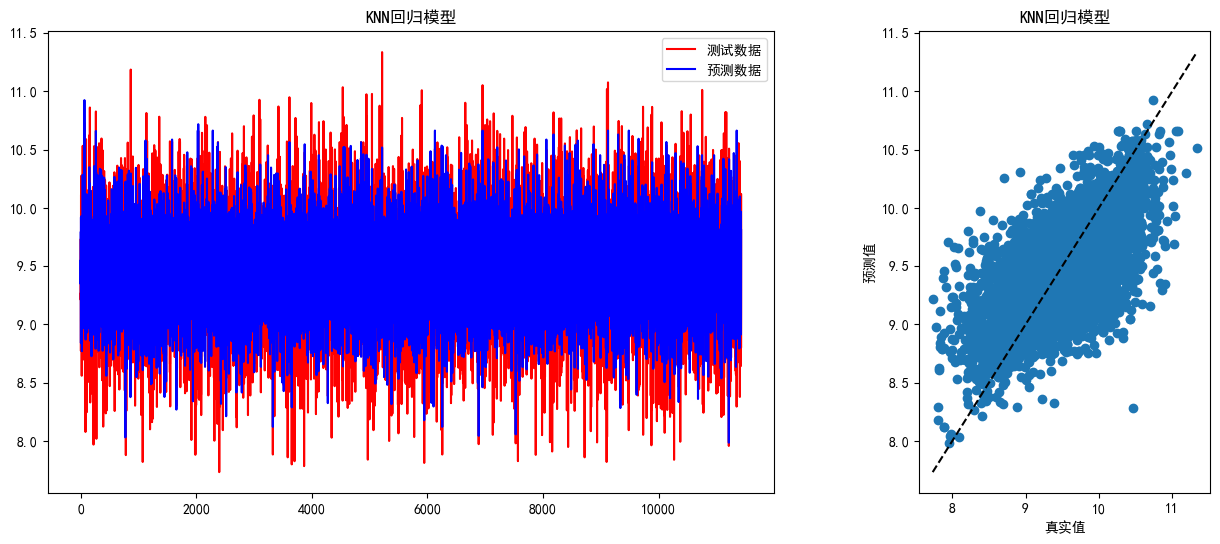

In [7]:
num=2
startTime = time.time()
knn = KNeighborsRegressor()
knn_modal = knn.fit (x_train, y_train)
stopTime = time.time()
fit_time[num-1]=stopTime-startTime
print('模型训练时间：',fit_time[num-1])
startTime=time.time()
y_pred = knn_modal.predict(x_test)
stopTime=time.time()
predict_time[num-1]=stopTime-startTime
print('模型预测时间：',predict_time[num-1])

#训练后模型指标
MSE[num-1] = metrics.mean_squared_error(y_test, y_pred)
RMSE[num-1] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
Rsquare[num-1] = metrics.r2_score(y_test, y_pred)
score1[num-1]=knn_modal.score(x_train,y_train)
score2[num-1]=knn_modal.score(x_test,y_test)
print("Train success! \nSome results :")
print('MSE:', MSE[num-1])
print('RMSE:', RMSE[num-1])
print('Rsquare:', Rsquare[num-1])
print("训练集分数：",score1[num-1])
print("验证集分数：",score2[num-1])


#画图
mpl.rcParams['font.family'] = ['sans-serif']
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False     #显示中文

str1='KNN回归模型'
grid = plt.GridSpec(1, 3, wspace=0.5, hspace=0.5)
plt.figure(figsize=(15,6))
ax1=plt.subplot(grid[0,0:2])
ax1.plot(range(len(y_test)), y_test, 'r', label='测试数据')
ax1.plot(range(len(y_test)), y_pred, 'b', label='预测数据')
ax1.legend(['测试数据','预测数据'])
ax1.set_title(str1)

ax2=plt.subplot(grid[0,2])
ax2.scatter(y_test, y_pred)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax2.set(xlabel='真实值',ylabel='预测值')
ax2.set_title(str1)

plt.savefig(fname='modal_picture/'+str1+'测试',bbox_inches='tight')

## 3、SVM回归模型

模型训练时间： 27.692357063293457
模型预测时间： 21.553284168243408
Train success! 
Some results :
MSE: 0.12367783711222588
RMSE: 0.35167859916723093
Rsquare: 0.42399589076406985
训练集分数： 0.42971328005929843
验证集分数： 0.42399589076406985


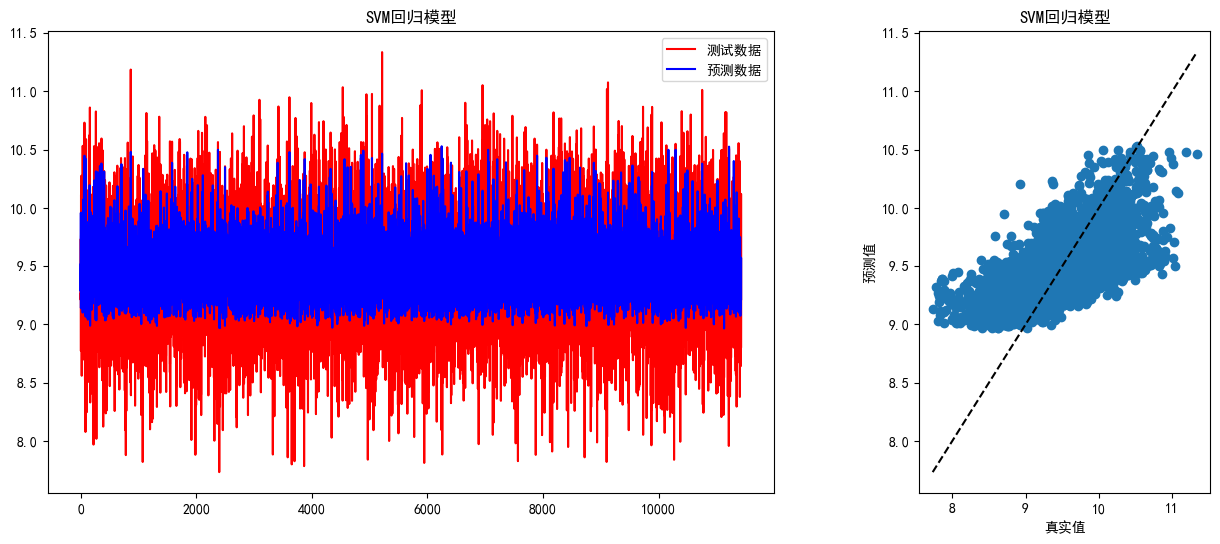

In [8]:
num=3
startTime = time.time()
svm = SVR()
svm_modal = svm.fit (x_train, y_train)
stopTime = time.time()
fit_time[num-1]=stopTime-startTime
print('模型训练时间：',fit_time[num-1])

startTime = time.time()
y_pred = svm_modal.predict(x_test)
stopTime = time.time()
predict_time[num-1]=stopTime-startTime
print('模型预测时间：',predict_time[num-1])


#训练后模型指标
MSE[num-1] = metrics.mean_squared_error(y_test, y_pred)
RMSE[num-1] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
Rsquare[num-1] = metrics.r2_score(y_test, y_pred)
score1[num-1]=svm_modal.score(x_train,y_train)
score2[num-1]=svm_modal.score(x_test,y_test)
print("Train success! \nSome results :")
print('MSE:', MSE[num-1])
print('RMSE:', RMSE[num-1])
print('Rsquare:', Rsquare[num-1])
print("训练集分数：",score1[num-1])
print("验证集分数：",score2[num-1])


#画图
mpl.rcParams['font.family'] = ['sans-serif']
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False     #显示中文

str1='SVM回归模型'
grid = plt.GridSpec(1, 3, wspace=0.5, hspace=0.5)
plt.figure(figsize=(15,6))
ax1=plt.subplot(grid[0,0:2])
ax1.plot(range(len(y_test)), y_test, 'r', label='测试数据')
ax1.plot(range(len(y_test)), y_pred, 'b', label='预测数据')
ax1.legend(['测试数据','预测数据'])
ax1.set_title(str1)

ax2=plt.subplot(grid[0,2])
ax2.scatter(y_test, y_pred)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax2.set(xlabel='真实值',ylabel='预测值')
ax2.set_title(str1)

plt.savefig(fname='modal_picture/'+str1+'测试',bbox_inches='tight')

## 4、岭回归模型

模型训练时间： 0.016199588775634766
模型预测时间： 0.0029892921447753906
Train success! 
Some results :
MSE: 0.07111407781622335
RMSE: 0.2666722291807367
Rsquare: 0.6688007972721965
训练集分数： 0.6672284246610727
验证集分数： 0.6688007972721965


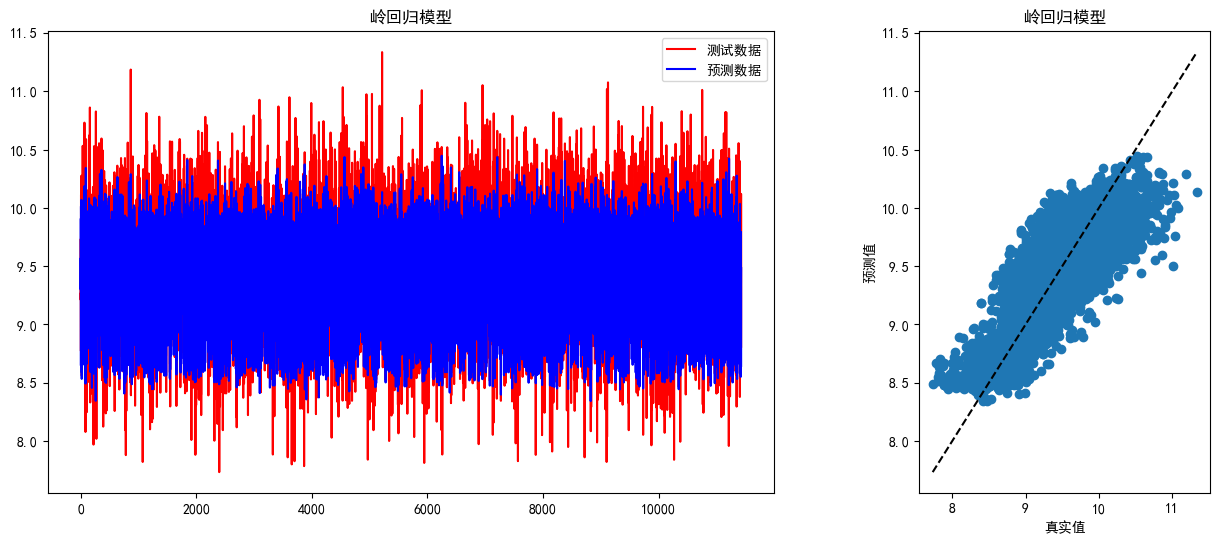

In [9]:
num=4
startTime = time.time()
ridge = Ridge()
ri_modal = ridge.fit (x_train, y_train)
stopTime = time.time()
fit_time[num-1]=stopTime-startTime
print('模型训练时间：',fit_time[num-1])
startTime = time.time()
y_pred = ri_modal.predict(x_test)
stopTime = time.time()
predict_time[num-1]=stopTime-startTime
print('模型预测时间：',predict_time[num-1])

#训练后模型指标
MSE[num-1] = metrics.mean_squared_error(y_test, y_pred)
RMSE[num-1] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
Rsquare[num-1] = metrics.r2_score(y_test, y_pred)
score1[num-1]=ri_modal.score(x_train,y_train)
score2[num-1]=ri_modal.score(x_test,y_test)
print("Train success! \nSome results :")
print('MSE:', MSE[num-1])
print('RMSE:', RMSE[num-1])
print('Rsquare:', Rsquare[num-1])
print("训练集分数：",score1[num-1])
print("验证集分数：",score2[num-1])

#画图
mpl.rcParams['font.family'] = ['sans-serif']
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False     #显示中文

str1='岭回归模型'
grid = plt.GridSpec(1, 3, wspace=0.5, hspace=0.5)
plt.figure(figsize=(15,6))
ax1=plt.subplot(grid[0,0:2])
ax1.plot(range(len(y_test)), y_test, 'r', label='测试数据')
ax1.plot(range(len(y_test)), y_pred, 'b', label='预测数据')
ax1.legend(['测试数据','预测数据'])
ax1.set_title(str1)

ax2=plt.subplot(grid[0,2])
ax2.scatter(y_test, y_pred)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax2.set(xlabel='真实值',ylabel='预测值')
ax2.set_title(str1)

plt.savefig(fname='modal_picture/'+str1+'测试',bbox_inches='tight')

## 5、多层感知机回归

模型训练时间： 1.9039101600646973
模型预测时间： 0.0036466121673583984
Train success! 
Some results :
MSE: 0.07172163009184018
RMSE: 0.26780894326336485
Rsquare: 0.6659712474069819
训练集分数： 0.6650567921420767
验证集分数： 0.6659712474069819


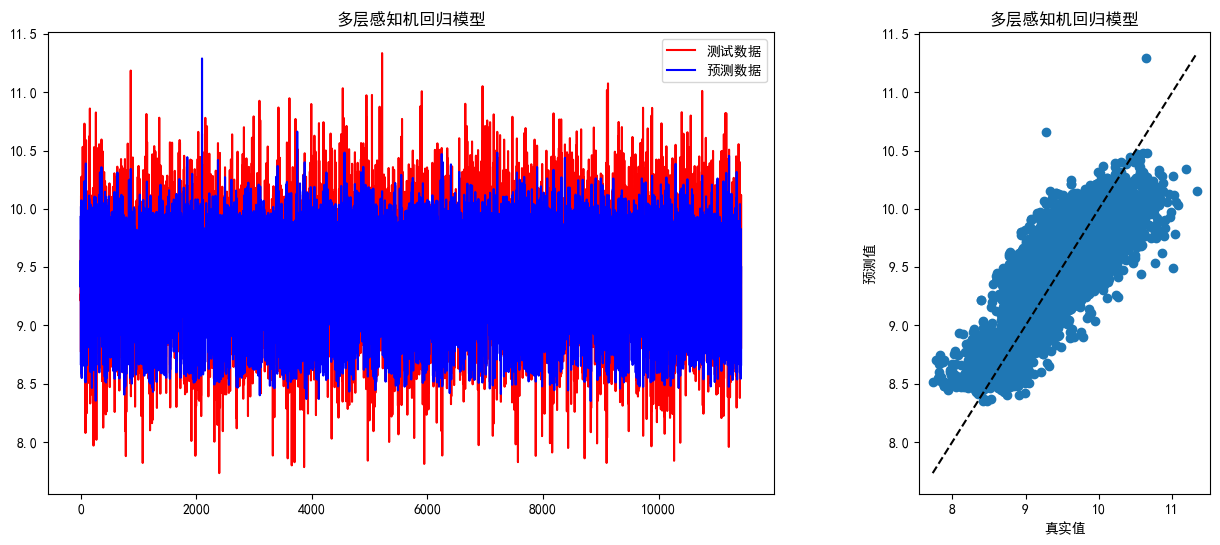

In [19]:
num=5
startTime = time.time()
mlp = MLPRegressor(hidden_layer_sizes=(6,2),learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=10000, shuffle=True)
mlp_modal = mlp.fit (x_train, y_train)
stopTime = time.time()
fit_time[num-1]=stopTime-startTime
print('模型训练时间：',fit_time[num-1])
startTime = time.time()
y_pred = mlp_modal.predict(x_test)
stopTime = time.time()
predict_time[num-1]=stopTime-startTime
print('模型预测时间：',predict_time[num-1])

#训练后模型指标
MSE[num-1] = metrics.mean_squared_error(y_test, y_pred)
RMSE[num-1] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
Rsquare[num-1] = metrics.r2_score(y_test, y_pred)
score1[num-1]=mlp_modal.score(x_train,y_train)
score2[num-1]=mlp_modal.score(x_test,y_test)
print("Train success! \nSome results :")
print('MSE:', MSE[num-1])
print('RMSE:', RMSE[num-1])
print('Rsquare:', Rsquare[num-1])
print("训练集分数：",score1[num-1])
print("验证集分数：",score2[num-1])

#画图
mpl.rcParams['font.family'] = ['sans-serif']
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False     #显示中文

str1='多层感知机回归模型'
grid = plt.GridSpec(1, 3, wspace=0.5, hspace=0.5)
plt.figure(figsize=(15,6))
ax1=plt.subplot(grid[0,0:2])
ax1.plot(range(len(y_test)), y_test, 'r', label='测试数据')
ax1.plot(range(len(y_test)), y_pred, 'b', label='预测数据')
ax1.legend(['测试数据','预测数据'])
ax1.set_title(str1)

ax2=plt.subplot(grid[0,2])
ax2.scatter(y_test, y_pred)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax2.set(xlabel='真实值',ylabel='预测值')
ax2.set_title(str1)

plt.savefig(fname='modal_picture/'+str1+'测试',bbox_inches='tight')

## 6、极限树回归

模型训练时间： 0.1419224739074707
模型预测时间： 0.0072174072265625
Train success! 
Some results :
MSE: 0.08483232214047318
RMSE: 0.29125988762696653
Rsquare: 0.6049108935774847
训练集分数： 0.9987438306515605
验证集分数： 0.6049108935774847


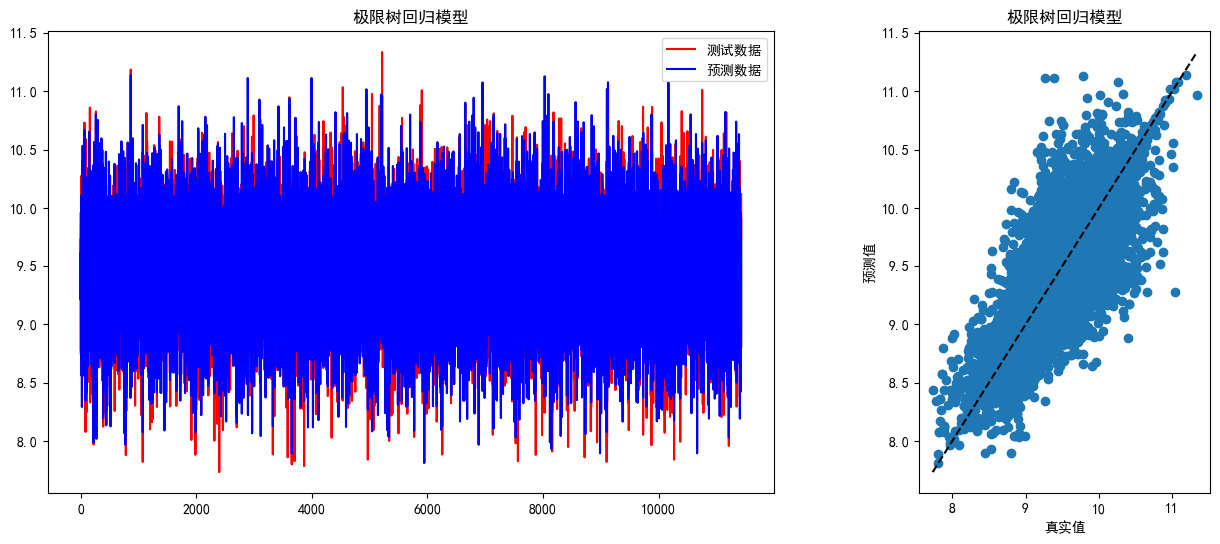

In [11]:
num=6
startTime = time.time()
ETR = ExtraTreeRegressor()
ETR_modal = ETR.fit (x_train, y_train)
stopTime = time.time()
fit_time[num-1]=stopTime-startTime
print('模型训练时间：',fit_time[num-1])
startTime = time.time()
y_pred = ETR_modal.predict(x_test)
stopTime = time.time()
predict_time[num-1]=stopTime-startTime
print('模型预测时间：',predict_time[num-1])

#训练后模型指标
MSE[num-1] = metrics.mean_squared_error(y_test, y_pred)
RMSE[num-1] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
Rsquare[num-1] = metrics.r2_score(y_test, y_pred)
score1[num-1]=ETR_modal.score(x_train,y_train)
score2[num-1]=ETR_modal.score(x_test,y_test)
print("Train success! \nSome results :")
print('MSE:', MSE[num-1])
print('RMSE:', RMSE[num-1])
print('Rsquare:', Rsquare[num-1])
print("训练集分数：",score1[num-1])
print("验证集分数：",score2[num-1])

#画图
mpl.rcParams['font.family'] = ['sans-serif']
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False     #显示中文

str1='极限树回归模型'
grid = plt.GridSpec(1, 3, wspace=0.5, hspace=0.5)
plt.figure(figsize=(15,6))
ax1=plt.subplot(grid[0,0:2])
ax1.plot(range(len(y_test)), y_test, 'r', label='测试数据')
ax1.plot(range(len(y_test)), y_pred, 'b', label='预测数据')
ax1.legend(['测试数据','预测数据'])
ax1.set_title(str1)

ax2=plt.subplot(grid[0,2])
ax2.scatter(y_test, y_pred)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax2.set(xlabel='真实值',ylabel='预测值')
ax2.set_title(str1)

plt.savefig(fname='modal_picture/'+str1+'测试',bbox_inches='tight')

## 7、决策树回归

模型训练时间： 0.27860093116760254
模型预测时间： 0.005986928939819336
Train success! 
Some results :
MSE: 0.07386735108185193
RMSE: 0.2717854872539222
Rsquare: 0.6559779928645447
训练集分数： 0.9987438306515605
验证集分数： 0.6559779928645447


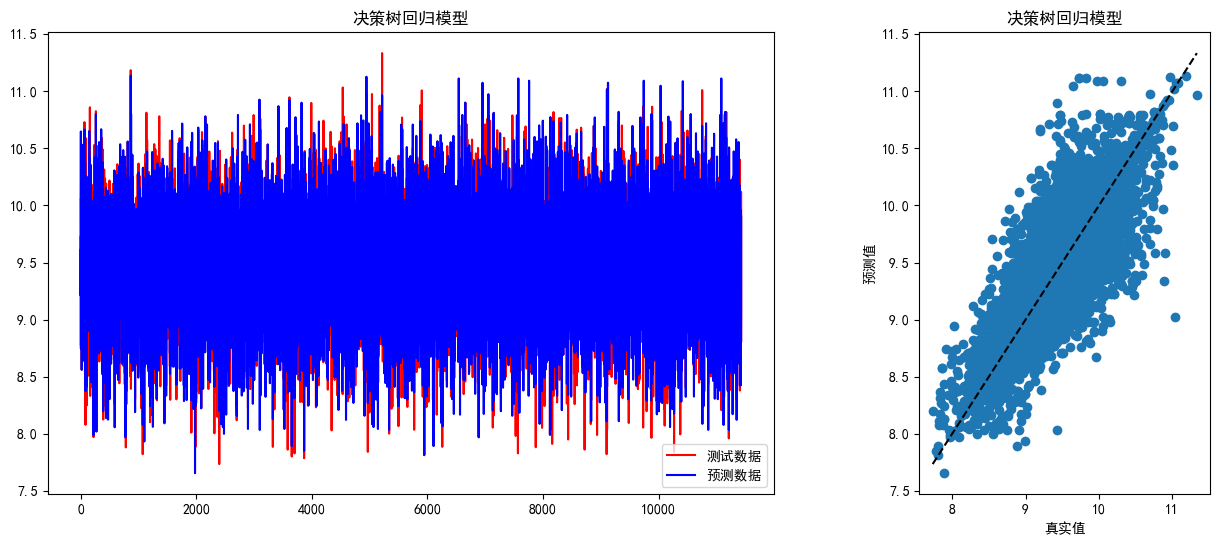

In [12]:
num=7
startTime = time.time()
DTR = DecisionTreeRegressor()
DTR_modal = DTR.fit (x_train, y_train)
stopTime = time.time()
fit_time[num-1]=stopTime-startTime
print('模型训练时间：',fit_time[num-1])
startTime = time.time()
y_pred = DTR_modal.predict(x_test)
stopTime= time.time()
predict_time[num-1]=stopTime-startTime
print('模型预测时间：',predict_time[num-1])

#训练后模型指标
MSE[num-1] = metrics.mean_squared_error(y_test, y_pred)
RMSE[num-1] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
Rsquare[num-1] = metrics.r2_score(y_test, y_pred)
score1[num-1]=DTR_modal.score(x_train,y_train)
score2[num-1]=DTR_modal.score(x_test,y_test)
print("Train success! \nSome results :")
print('MSE:', MSE[num-1])
print('RMSE:', RMSE[num-1])
print('Rsquare:', Rsquare[num-1])
print("训练集分数：",score1[num-1])
print("验证集分数：",score2[num-1])

#画图
mpl.rcParams['font.family'] = ['sans-serif']
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False     #显示中文

str1='决策树回归模型'
grid = plt.GridSpec(1, 3, wspace=0.5, hspace=0.5)
plt.figure(figsize=(15,6))
ax1=plt.subplot(grid[0,0:2])
ax1.plot(range(len(y_test)), y_test, 'r', label='测试数据')
ax1.plot(range(len(y_test)), y_pred, 'b', label='预测数据')
ax1.legend(['测试数据','预测数据'])
ax1.set_title(str1)

ax2=plt.subplot(grid[0,2])
ax2.scatter(y_test, y_pred)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax2.set(xlabel='真实值',ylabel='预测值')
ax2.set_title(str1)

plt.savefig(fname='modal_picture/'+str1+'测试',bbox_inches='tight')

## 8、随机森林回归

模型训练时间： 21.278258085250854
模型预测时间： 0.3680281639099121
Train success! 
Some results :
MSE: 0.044031312664958286
RMSE: 0.20983639499609757
Rsquare: 0.7949332101672005
训练集分数： 0.9706504765048992
验证集分数： 0.7949332101672005


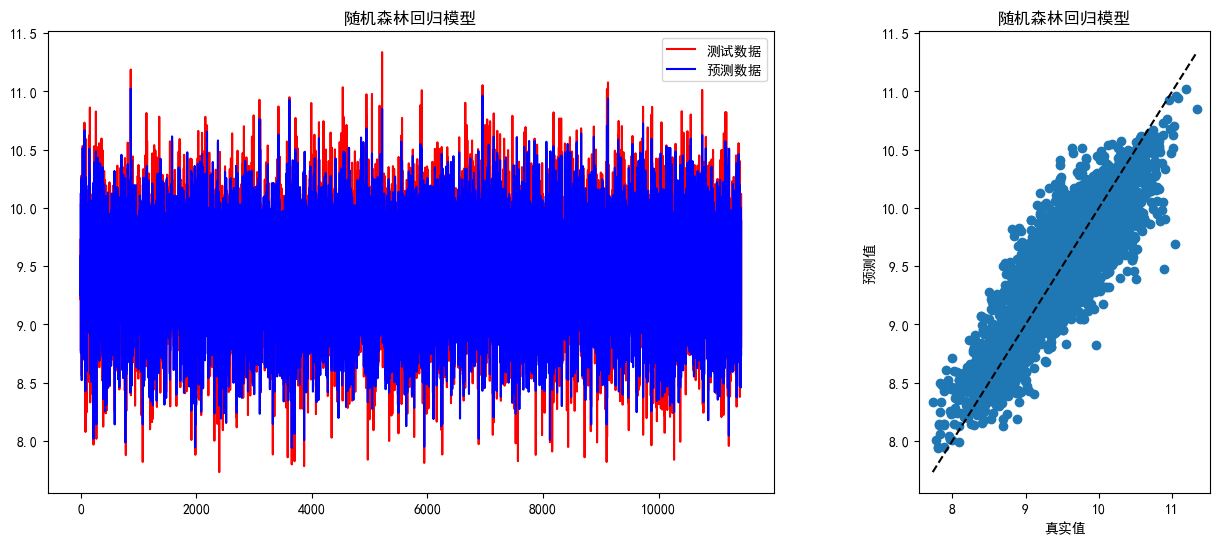

In [13]:
num=8
startTime = time.time()
RFE = RandomForestRegressor()
RFE_modal = RFE.fit (x_train, y_train)
stopTime = time.time()
fit_time[num-1]=stopTime-startTime
print('模型训练时间：',fit_time[num-1])
startTime = time.time()
y_pred = RFE_modal.predict(x_test)
stopTime = time.time()
predict_time[num-1]=stopTime-startTime
print('模型预测时间：',predict_time[num-1])

#训练后模型指标
MSE[num-1] = metrics.mean_squared_error(y_test, y_pred)
RMSE[num-1] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
Rsquare[num-1] = metrics.r2_score(y_test, y_pred)
score1[num-1]=RFE_modal.score(x_train,y_train)
score2[num-1]=RFE_modal.score(x_test,y_test)
print("Train success! \nSome results :")
print('MSE:', MSE[num-1])
print('RMSE:', RMSE[num-1])
print('Rsquare:', Rsquare[num-1])
print("训练集分数：",score1[num-1])
print("验证集分数：",score2[num-1])

#画图
mpl.rcParams['font.family'] = ['sans-serif']
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False     #显示中文

str1='随机森林回归模型'
grid = plt.GridSpec(1, 3, wspace=0.5, hspace=0.5)
plt.figure(figsize=(15,6))
ax1=plt.subplot(grid[0,0:2])
ax1.plot(range(len(y_test)), y_test, 'r', label='测试数据')
ax1.plot(range(len(y_test)), y_pred, 'b', label='预测数据')
ax1.legend(['测试数据','预测数据'])
ax1.set_title(str1)

ax2=plt.subplot(grid[0,2])
ax2.scatter(y_test, y_pred)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax2.set(xlabel='真实值',ylabel='预测值')
ax2.set_title(str1)

plt.savefig(fname='modal_picture/'+str1+'测试',bbox_inches='tight')

## 9、AdaBoost回归

模型训练时间： 1.5156314373016357
模型预测时间： 0.0665888786315918
Train success! 
Some results :
MSE: 0.09587563113357864
RMSE: 0.3096379032573025
Rsquare: 0.5534789514598452
训练集分数： 0.5592047944492817
验证集分数： 0.5534789514598452


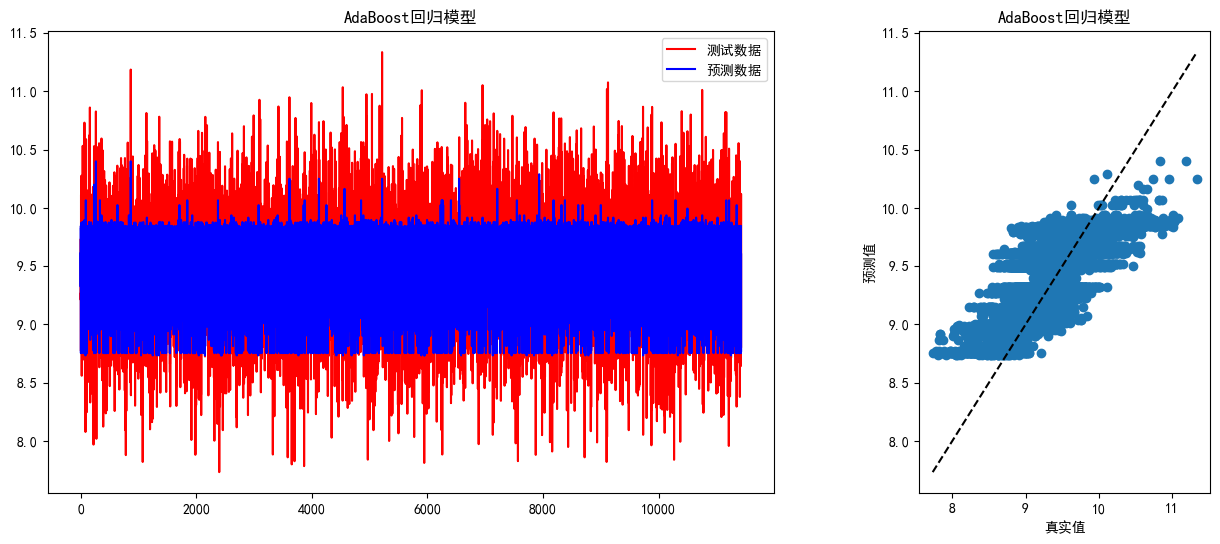

In [14]:
num=9
startTime = time.time()
Ada = AdaBoostRegressor()
Ada_modal = Ada.fit (x_train, y_train)
stopTime = time.time()
fit_time[num-1]=stopTime-startTime
print('模型训练时间：',fit_time[num-1])
startTime = time.time()
y_pred = Ada_modal.predict(x_test)
stopTime = time.time()
predict_time[num-1]=stopTime-startTime
print('模型预测时间：',predict_time[num-1])

#训练后模型指标
MSE[num-1] = metrics.mean_squared_error(y_test, y_pred)
RMSE[num-1] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
Rsquare[num-1] = metrics.r2_score(y_test, y_pred)
score1[num-1]=Ada_modal.score(x_train,y_train)
score2[num-1]=Ada_modal.score(x_test,y_test)
print("Train success! \nSome results :")
print('MSE:', MSE[num-1])
print('RMSE:', RMSE[num-1])
print('Rsquare:', Rsquare[num-1])
print("训练集分数：",score1[num-1])
print("验证集分数：",score2[num-1])


#画图
mpl.rcParams['font.family'] = ['sans-serif']
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False     #显示中文

str1='AdaBoost回归模型'
grid = plt.GridSpec(1, 3, wspace=0.5, hspace=0.5)
plt.figure(figsize=(15,6))
ax1=plt.subplot(grid[0,0:2])
ax1.plot(range(len(y_test)), y_test, 'r', label='测试数据')
ax1.plot(range(len(y_test)), y_pred, 'b', label='预测数据')
ax1.legend(['测试数据','预测数据'])
ax1.set_title(str1)

ax2=plt.subplot(grid[0,2])
ax2.scatter(y_test, y_pred)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax2.set(xlabel='真实值',ylabel='预测值')
ax2.set_title(str1)

plt.savefig(fname='modal_picture/'+str1+'测试',bbox_inches='tight')

### 10、梯度提升回归

模型训练时间： 2.7632806301116943
模型预测时间： 0.014097929000854492
Train success! 
Some results :
MSE: 0.06556438585806713
RMSE: 0.25605543512698015
Rsquare: 0.6946473470464372
训练集分数： 0.7006282818850377
验证集分数： 0.6946473470464372


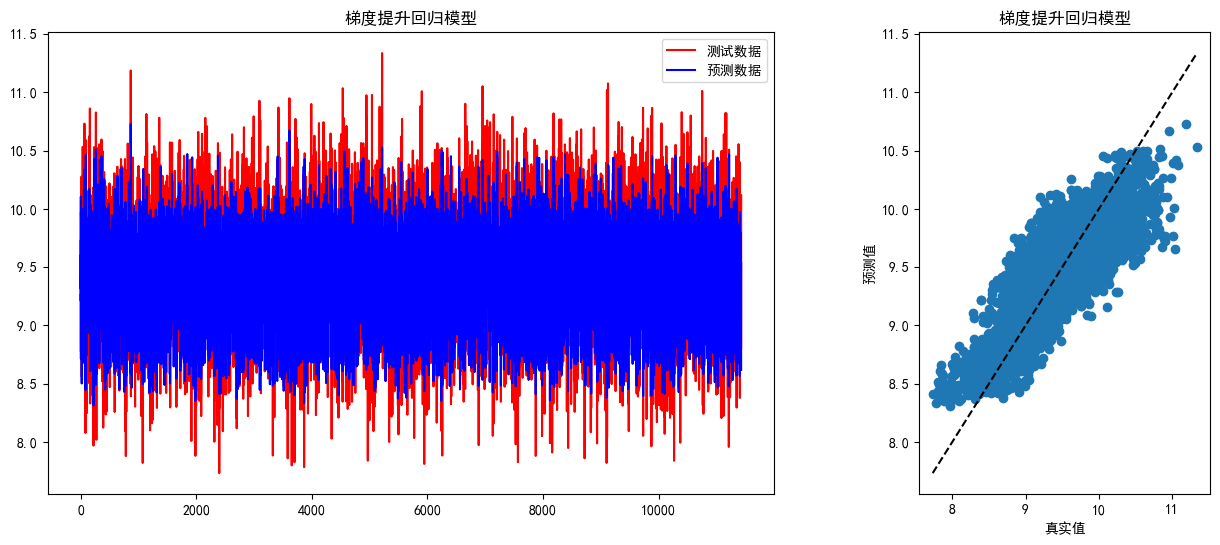

In [15]:
num=10
startTime = time.time()
GBR = GradientBoostingRegressor()
GBR_modal = GBR.fit (x_train, y_train)
stopTime = time.time()
fit_time[num-1]=stopTime-startTime
print('模型训练时间：',fit_time[num-1])
startTime = time.time()
y_pred = GBR_modal.predict(x_test)
stopTime = time.time()
predict_time[num-1]=stopTime-startTime
print('模型预测时间：',predict_time[num-1])

#训练后模型指标
MSE[num-1] = metrics.mean_squared_error(y_test, y_pred)
RMSE[num-1] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
Rsquare[num-1] = metrics.r2_score(y_test, y_pred)
score1[num-1]=GBR_modal.score(x_train,y_train)
score2[num-1]=GBR_modal.score(x_test,y_test)
print("Train success! \nSome results :")
print('MSE:', MSE[num-1])
print('RMSE:', RMSE[num-1])
print('Rsquare:', Rsquare[num-1])
print("训练集分数：",score1[num-1])
print("验证集分数：",score2[num-1])


#画图
mpl.rcParams['font.family'] = ['sans-serif']
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False     #显示中文

str1='梯度提升回归模型'
grid = plt.GridSpec(1, 3, wspace=0.5, hspace=0.5)
plt.figure(figsize=(15,6))
ax1=plt.subplot(grid[0,0:2])
ax1.plot(range(len(y_test)), y_test, 'r', label='测试数据')
ax1.plot(range(len(y_test)), y_pred, 'b', label='预测数据')
ax1.legend(['测试数据','预测数据'])
ax1.set_title(str1)

ax2=plt.subplot(grid[0,2])
ax2.scatter(y_test, y_pred)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax2.set(xlabel='真实值',ylabel='预测值')
ax2.set_title(str1)

plt.savefig(fname='modal_picture/'+str1+'测试',bbox_inches='tight')

### 11、Bagging回归

模型训练时间： 2.2208237648010254
模型预测时间： 0.04767251014709473
Train success! 
Some results :
MSE: 0.04857666763451932
RMSE: 0.22040115161795168
Rsquare: 0.7737641535153819
训练集分数： 0.9598280039704274
验证集分数： 0.7737641535153819


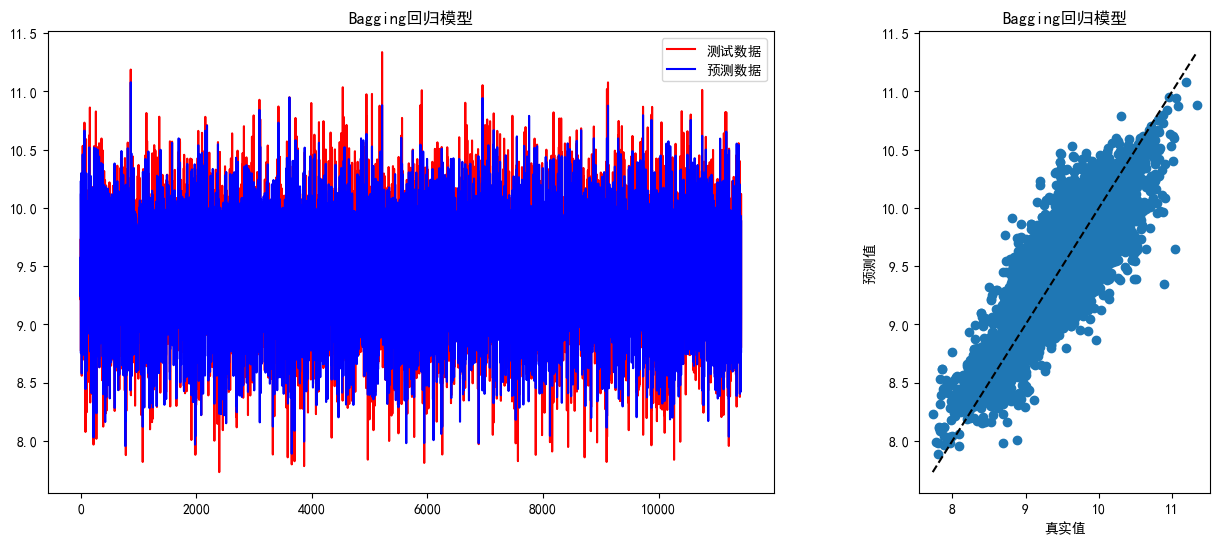

In [16]:
num=11
startTime = time.time()
BAG = BaggingRegressor()
BAG_modal = BAG.fit (x_train, y_train)
stopTime = time.time()
fit_time[num-1]=stopTime-startTime
print('模型训练时间：',fit_time[num-1])
startTime = time.time()
y_pred = BAG_modal.predict(x_test)
stopTime = time.time()
predict_time[num-1]=stopTime-startTime
print('模型预测时间：',predict_time[num-1])

#训练后模型指标
MSE[num-1] = metrics.mean_squared_error(y_test, y_pred)
RMSE[num-1] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
Rsquare[num-1] = metrics.r2_score(y_test, y_pred)
score1[num-1]=BAG_modal.score(x_train,y_train)
score2[num-1]=BAG_modal.score(x_test,y_test)
print("Train success! \nSome results :")
print('MSE:', MSE[num-1])
print('RMSE:', RMSE[num-1])
print('Rsquare:', Rsquare[num-1])
print("训练集分数：",score1[num-1])
print("验证集分数：",score2[num-1])

#画图
mpl.rcParams['font.family'] = ['sans-serif']
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False     #显示中文

str1='Bagging回归模型'
grid = plt.GridSpec(1, 3, wspace=0.5, hspace=0.5)
plt.figure(figsize=(15,6))
ax1=plt.subplot(grid[0,0:2])
ax1.plot(range(len(y_test)), y_test, 'r', label='测试数据')
ax1.plot(range(len(y_test)), y_pred, 'b', label='预测数据')
ax1.legend(['测试数据','预测数据'])
ax1.set_title(str1)

ax2=plt.subplot(grid[0,2])
ax2.scatter(y_test, y_pred)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax2.set(xlabel='真实值',ylabel='预测值')
ax2.set_title(str1)

plt.savefig(fname='modal_picture/'+str1+'测试',bbox_inches='tight')

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
[0.07111053 0.11479659 0.12367784 0.07111408 0.07172163 0.08483232
 0.07386735 0.04403131 0.09587563 0.06556439 0.04857667]
[0.26666558 0.33881646 0.3516786  0.26667223 0.26780894 0.29125989
 0.27178549 0.20983639 0.3096379  0.25605544 0.22040115]
[0.66881731 0.46535845 0.42399589 0.6688008  0.66597125 0.60491089
 0.65597799 0.79493321 0.55347895 0.69464735 0.77376415]
[1.14785671e-01 5.51795959e-03 2.76923571e+01 1.61995888e-02
 1.90391016e+00 1.41922474e-01 2.78600931e-01 2.12782581e+01
 1.51563144e+00 2.76328063e+00 2.22082376e+00]
[3.20172310e-03 2.22018480e-01 2.15532842e+01 2.98929214e-03
 3.64661217e-03 7.21740723e-03 5.98692894e-03 3.68028164e-01
 6.65888786e-02 1.40979290e-02 4.76725101e-02]
[0.66722912 0.65453628 0.42971328 0.66722842 0.66505679 0.99874383
 0.99874383 0.97065048 0.55920479 0.70062828 0.959828  ]
[0.66881731 0.46535845 0.42399589 0.6688008  0.66597125 0.60491089
 0.65597799 0.79493321 0.55347895 0.69464735 0.773764

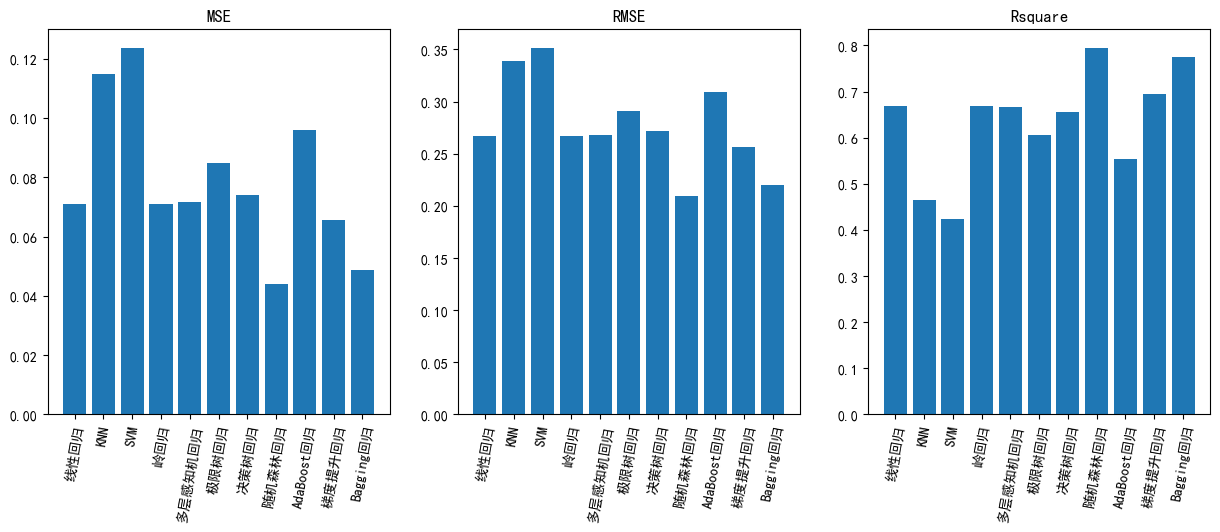

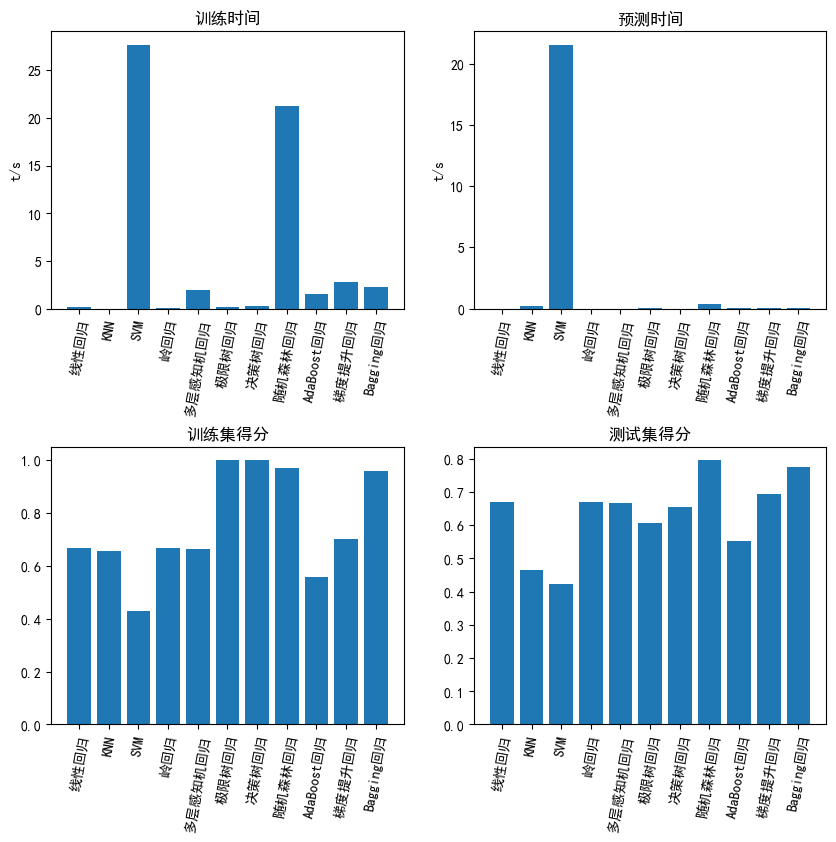

In [20]:
temp_num=np.linspace(1,11,11)
name=['A','B','C','D','E','F','G','H','I','J','K']
name1=['线性回归','KNN','SVM','岭回归','多层感知机回归'\
      ,'极限树回归','决策树回归','随机森林回归','AdaBoost回归'\
       ,'梯度提升回归','Bagging回归']
print(temp_num)
print(MSE)
print(RMSE)
print(Rsquare)
print(fit_time)
print(predict_time)
print(score1)
print(score2)
fig, axes = plt.subplots(1, 3,figsize=(15, 5))
axes[0].bar(x=name,height=MSE)
axes[0].set_title('MSE')
axes[0].xaxis.set_major_locator(mticker.FixedLocator(axes[0].get_xticks()))
axes[0].set_xticklabels(name1,rotation=80)
axes[1].bar(x=name,height=RMSE)
axes[1].set_title('RMSE')
axes[1].xaxis.set_major_locator(mticker.FixedLocator(axes[1].get_xticks()))
axes[1].set_xticklabels(name1,rotation=80)
axes[2].bar(x=name,height=Rsquare)
axes[2].set_title('Rsquare')
axes[2].xaxis.set_major_locator(mticker.FixedLocator(axes[2].get_xticks()))
axes[2].set_xticklabels(name1,rotation=80)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, \
    wspace=None, hspace=0.5)
plt.savefig(fname='modal_picture/对比1',bbox_inches='tight')

fig, axes = plt.subplots(2, 2,figsize=(10, 9))
axes[0,0].bar(x=name,height=fit_time)
axes[0,0].set_title('训练时间')
axes[0,0].xaxis.set_major_locator(mticker.FixedLocator(axes[0,0].get_xticks()))
axes[0,0].set_xticklabels(name1,rotation=80)
axes[0,0].set(ylabel='t/s')
axes[0,1].bar(x=name,height=predict_time)
axes[0,1].set_title('预测时间')
axes[0,1].xaxis.set_major_locator(mticker.FixedLocator(axes[0,1].get_xticks()))
axes[0,1].set_xticklabels(name1,rotation=80)
axes[0,1].set(ylabel='t/s')
axes[1,0].bar(x=name,height=score1)
axes[1,0].set_title('训练集得分')
axes[1,0].xaxis.set_major_locator(mticker.FixedLocator(axes[1,0].get_xticks()))
axes[1,0].set_xticklabels(name1,rotation=80)
axes[1,1].bar(x=name,height=score2)
axes[1,1].set_title('测试集得分')
axes[1,1].xaxis.set_major_locator(mticker.FixedLocator(axes[1,1].get_xticks()))
axes[1,1].set_xticklabels(name1,rotation=80)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, \
    wspace=None, hspace=0.5)
plt.savefig(fname='modal_picture/对比2',bbox_inches='tight')